### Importing relevant (and maybe not relevant) packages

In [2]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import re
from itertools import combinations


# Producing a single main dataframe for exploration

The given csv files contain relevant information, but are all disjoint.  We combine them into a single data which can either be used on its own, or further manipulated to study the data.

### Making dataframes from the csv files.

In [3]:
# turn the csv files into panda data frames
applications_df = pd.read_csv('applications_2.csv')
assignments_df = pd.read_csv('assignments_2.csv')
departments_df = pd.read_csv('departments_2.csv')
employees_df = pd.read_csv('employees_2.csv')
entitlements_df = pd.read_csv('entitlements_2.csv')

data_frame_list = [applications_df, assignments_df, departments_df, employees_df, entitlements_df]


FileNotFoundError: [Errno 2] No such file or directory: 'applications_2.csv'

### A quick gander at each dataframe

In [ ]:
applications_df['name'] = applications_df['name'].astype(str).apply(lambda x: re.sub(r'\s+', '', x))
print(applications_df.info())
applications_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   application_id  50 non-null     object
 1   name            50 non-null     object
 2   description     50 non-null     object
 3   criticality     50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
None


,application_id,name,description,criticality
0,A001,CoreBanking,Core banking platform for account management,9
1,A002,PaymentHub,Payment processing and reconciliation system,8
2,A003,CustomerCRM,Customer relationship management platform,6
3,A004,LoanOriginationSystem,Loan application and processing system,8
4,A005,TreasuryManagement,Cash and liquidity management platform,7


In [ ]:
print(assignments_df.info())
assignments_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512716 entries, 0 to 512715
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   employee_id     512716 non-null  object
 1   entitlement_id  512716 non-null  object
 2   grant_date      512716 non-null  object
dtypes: object(3)
memory usage: 11.7+ MB
None


,employee_id,entitlement_id,grant_date
0,E001,ENT1292,2024-02-16
1,E001,ENT171,2024-07-26
2,E001,ENT486,2021-10-30
3,E001,ENT1368,2025-02-08
4,E001,ENT1774,2023-04-26


In [ ]:
print(departments_df.info())
#print(departments_df.name.value_counts())
departments_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  15 non-null     object
 1   name           15 non-null     object
 2   parent_id      10 non-null     object
dtypes: object(3)
memory usage: 492.0+ bytes
None


,department_id,name,parent_id
0,D001,Information Technology,NaN
1,D002,Finance,NaN
2,D003,Human Resources,NaN
3,D004,Operations,NaN
4,D005,Risk Management,NaN


In [ ]:
print(employees_df.info())
employees_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_id    1000 non-null   object
 1   name           1000 non-null   object
 2   department_id  1000 non-null   object
 3   job_title      1000 non-null   object
 4   hire_date      1000 non-null   object
 5   manager_id     999 non-null    object
dtypes: object(6)
memory usage: 47.0+ KB
None


,employee_id,name,department_id,job_title,hire_date,manager_id
0,E001,Alonzo Postley,D011,Interim Product Director,2021-07-09,NaN
1,E002,Billy Duran,D004,Principal Digital Director,2021-02-27,E001
2,E003,Michael Chavez,D005,Lead Data Director,2020-10-28,E001
3,E004,David Tennyson,D008,Chief Technical Director,2024-02-10,E001
4,E005,Jana Williams,D013,Lead Operations Director,2021-09-08,E001


In [ ]:
print(entitlements_df.info())
entitlements_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   entitlement_id  2000 non-null   object
 1   name            2000 non-null   object
 2   application_id  2000 non-null   object
 3   type            2000 non-null   object
 4   description     1985 non-null   object
 5   risk_level      2000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 93.9+ KB
None


,entitlement_id,name,application_id,type,description,risk_level
0,ENT001,Admin_Customeraccounts,A001,admin,Business user access,8
1,ENT002,Read_Accountsettings,A001,read,Modify information in CareBanking,6
2,ENT003,Admin_Transactionhistory,A001,admin,Basic system permission,8
3,ENT004,Read_Customeraccounts,A001,read,READ_59,6
4,ENT005,Read_Customerprofiles,A001,read,MIGRATED_FROM_DOS,6


In [ ]:
print(entitlements_df.info())
entitlements_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   entitlement_id  2000 non-null   object
 1   name            2000 non-null   object
 2   application_id  2000 non-null   object
 3   type            2000 non-null   object
 4   description     1985 non-null   object
 5   risk_level      2000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 93.9+ KB
None


,entitlement_id,name,application_id,type,description,risk_level
0,ENT001,Admin_Customeraccounts,A001,admin,Business user access,8
1,ENT002,Read_Accountsettings,A001,read,Modify information in CareBanking,6
2,ENT003,Admin_Transactionhistory,A001,admin,Basic system permission,8
3,ENT004,Read_Customeraccounts,A001,read,READ_59,6
4,ENT005,Read_Customerprofiles,A001,read,MIGRATED_FROM_DOS,6


In [ ]:
for df in data_frame_list:
    print(df.shape)
    #print(df.value_counts)
    print(df.dtypes, '\n')

(50, 4)
application_id    object
name              object
description       object
criticality        int64
dtype: object 

(512716, 3)
employee_id       object
entitlement_id    object
grant_date        object
dtype: object 

(15, 3)
department_id    object
name             object
parent_id        object
dtype: object 

(1000, 6)
employee_id      object
name             object
department_id    object
job_title        object
hire_date        object
manager_id       object
dtype: object 

(2000, 6)
entitlement_id    object
name              object
application_id    object
type              object
description       object
risk_level         int64
dtype: object 



### Combine all the data into a single frame

As seen above, there are some shared columns among various dataframes.  We use those coolumns to merge them in various stages until we have a single dataframe.

Combine employee and department using department_id

In [ ]:
# start producing a singular dataframe

#merge employees with departments to get department name for each employee
employee_department_df = employees_df.merge(departments_df, on='department_id')

# properly label department column
employee_department_df.rename(columns={'name_y': 'department', 'name_x': 'employee_name'},inplace=True)

# remove department_id column
employee_department_df.drop(['department_id'], axis=1,inplace=True)

employee_department_df.head()

,employee_id,employee_name,job_title,hire_date,manager_id,department,parent_id
0,E001,Alonzo Postley,Interim Product Director,2021-07-09,NaN,Treasury,D002
1,E002,Billy Duran,Principal Digital Director,2021-02-27,E001,Operations,NaN
2,E003,Michael Chavez,Lead Data Director,2020-10-28,E001,Risk Management,NaN
3,E004,David Tennyson,Chief Technical Director,2024-02-10,E001,Recruitment,D003
4,E005,Jana Williams,Lead Operations Director,2021-09-08,E001,Credit Risk,D005


In [ ]:
employee_department_df.department.value_counts()

department
Treasury                   81
Human Resources            77
Infrastructure             74
Operations                 72
Finance                    71
Market Risk                70
Risk Management            69
Accounting                 66
Information Technology     65
Data Management            64
Security                   63
Financial Planning         62
Recruitment                58
Credit Risk                54
Application Development    54
Name: count, dtype: int64

Combine entitlements and applications using application_id.

In [ ]:
# combine entitlements and applications
entitlement_application_df = entitlements_df.merge(applications_df, on='application_id')

#update column names
old_column_names_e_a = ['name_x', 'description_x', 'name_y', 'description_y', 'type']
new_column_names_e_a = ['entitlement_name', 'entitlement_description', 'app_name', 'app_description', 'entitlement_type']
column_name_change_e_a = list(zip(old_column_names_e_a, new_column_names_e_a))
entitlement_application_df.rename(columns=dict(column_name_change_e_a), inplace=True)

#remove app_id column
entitlement_application_df.drop(['application_id'], axis=1, inplace=True)

entitlement_application_df.head()
entitlement_application_df['entitlement_type'].value_counts()
entitlement_application_df[entitlement_application_df['entitlement_type'] == 'monitor'].head()

,entitlement_id,entitlement_name,entitlement_type,entitlement_description,risk_level,app_name,app_description,criticality


In [ ]:
entitlement_application_df['entitlement_type'].value_counts()

entitlement_type
read       525
write      517
admin      491
execute    467
Name: count, dtype: int64

Combine the two dataframes into the assignments dataframe using entitlement_id and employee_id.

In [ ]:
# merge the two together in assignments
##full_df = assignments_df.merge(employee_department_df, on='employee_id', how='left')
#print(full_df.head())
#full_df = full_df.merge(entitlement_application_df, on='entitlement_id', how='left')
#full_df = assignments_df.merge(entitlement_application_df, on='entitlement_id', how='left')

# Step 1: Merge assignments with entitlement info
full_df_1 = assignments_df.merge(entitlement_application_df, on='entitlement_id', how='left')

# Step 2: Merge with department info
full_df = full_df_1.merge(employee_department_df, on='employee_id', how='left')

# capitalize app_name
full_df['entitlement_type'] = full_df['entitlement_type'].str.capitalize()


The entitlement name will contains relevant information, but is a bit weird to read, so we introduct a cleaned up version of this column (as best as possible).

In [ ]:
def clean_entitlement_name(row):
    prefix = f"{row['entitlement_type']}_{row['app_name']}"
    full = row['entitlement_name']

    # Match the pattern: type_appbase followed by suffix
    pattern = f"^{re.escape(prefix)}(.*)"
    match = re.match(pattern, full)
    
    
    if match:
        suffix = match.group(1)
        return f"{prefix}_{suffix}"
    else:
        return full  # fallback if the pattern doesn't match
     

full_df['entitlement_name_clean'] = full_df.apply(clean_entitlement_name, axis=1)

Details of the full dataframe (for the moment).

In [ ]:
print(full_df.shape)
print(full_df.dtypes)
full_df.head()

(512716, 17)
employee_id                object
entitlement_id             object
grant_date                 object
entitlement_name           object
entitlement_type           object
entitlement_description    object
risk_level                  int64
app_name                   object
app_description            object
criticality                 int64
employee_name              object
job_title                  object
hire_date                  object
manager_id                 object
department                 object
parent_id                  object
entitlement_name_clean     object
dtype: object


,employee_id,entitlement_id,grant_date,entitlement_name,entitlement_type,entitlement_description,risk_level,app_name,app_description,criticality,employee_name,job_title,hire_date,manager_id,department,parent_id,entitlement_name_clean
0,E001,ENT1292,2024-02-16,Admin_TradingPlatformAsianotifications,Admin,MODIFY_accounts_TRADINGPLATFORM ASIA,8,TradingPlatformAsia,Financial instrument trading system - Asia reg...,9,Alonzo Postley,Interim Product Director,2021-07-09,NaN,Treasury,D002,Admin_TradingPlatformAsia_notifications
1,E001,ENT171,2024-07-26,Admin_FXpositions,Admin,Define FX positions in TreasuryManagement,8,TreasuryManagement,Cash and liquidity management platform,7,Alonzo Postley,Interim Product Director,2021-07-09,NaN,Treasury,D002,Admin_FXpositions
2,E001,ENT486,2021-10-30,Read_MobileBankingnotifications,Read,Retrieve MobileBanking notifications in Mobile...,4,MobileBanking,Mobile banking application platform,7,Alonzo Postley,Interim Product Director,2021-07-09,NaN,Treasury,D002,Read_MobileBanking_notifications
3,E001,ENT1368,2025-02-08,Admin_TradingPlatformAmericasconfigurationsett...,Admin,Control TradingPlatform Americas configuration...,8,TradingPlatformAmericas,Financial instrument trading system - Americas...,9,Alonzo Postley,Interim Product Director,2021-07-09,NaN,Treasury,D002,Admin_TradingPlatformAmericas_configurationset...
4,E001,ENT1774,2023-04-26,Write_CardManagementAsiaconfigurationsettings,Write,User access,6,CardManagementAsia,Credit and debit card issuance and management ...,8,Alonzo Postley,Interim Product Director,2021-07-09,NaN,Treasury,D002,Write_CardManagementAsia_configurationsettings


It might be necessary to have only certain columns for our studying purposes, so it would be handy to have a cleaner dataframe.

In [ ]:
# create a new data frame which has only relevant information in the form of an int


# removing grant_date, hire_date, parent_id and employee_name (employee_id will be enough to identify people),and app_description
main_df = full_df.copy()
main_df.drop(['employee_name', 'grant_date', 'hire_date', 'parent_id', 'app_description'], axis=1, inplace=True)

# replace all NaN values in manager_id with E000
main_df['manager_id'] = main_df['manager_id'].fillna('E000')

# turn the id columns into int by remvoving the letters and converting to an int
main_df['employee_id'] = main_df['employee_id'].str.replace('E', '').astype(int)
main_df['entitlement_id'] = main_df['entitlement_id'].str.replace('ENT', '').astype(int)
main_df['manager_id'] = main_df['manager_id'].str.replace('E', '').astype(int)

# change entitlement_types to int
#entitlement_types_dic = {'read':0,'write':1,'execute':2,'admin':3}
#main_df['entitlement_type'] = main_df['entitlement_type'].map(entitlement_types_dic)

# make some of the columns into categories and remove the worded columns
column_to_int = ['department', 'app_name', 'job_title']
#column_to_int_name = ['department_code', 'app_name_code', 'job_title_code']
#for column in column_to_int:
#    main_df[column] = pd.Categorical(main_df[column])

#for i in range(len(column_to_int)-2):
#    main_df[column_to_int_name[i]] = main_df[column_to_int[i]].cat.codes
#    main_df.drop([column_to_int[i]], axis=1, inplace=True)
main_df.head()

# drop [entitlement_name not dropped] and entitlement_description (for now)
entitlement_columns_to_drop = ['entitlement_description'] #'entitlement_name', 
for column in entitlement_columns_to_drop:
    main_df.drop([column], axis=1, inplace=True)


# dropping employee_id for the moment
main_df.drop(['employee_id'], axis=1, inplace=True)

# dropping criticality for the moment, as each app has a criticality attached to it
main_df.drop(['criticality'], axis=1, inplace=True)

#dropping manager_id for the moment
main_df.drop(['manager_id'], axis=1, inplace=True)

#dropping app name and entitlement type for the moment
main_df.drop(['entitlement_type'],axis=1, inplace=True)
main_df.drop(['app_name'],axis=1, inplace=True)

main_df.head()

,entitlement_id,entitlement_name,risk_level,job_title,department,entitlement_name_clean
0,1292,Admin_TradingPlatformAsianotifications,8,Interim Product Director,Treasury,Admin_TradingPlatformAsia_notifications
1,171,Admin_FXpositions,8,Interim Product Director,Treasury,Admin_FXpositions
2,486,Read_MobileBankingnotifications,4,Interim Product Director,Treasury,Read_MobileBanking_notifications
3,1368,Admin_TradingPlatformAmericasconfigurationsett...,8,Interim Product Director,Treasury,Admin_TradingPlatformAmericas_configurationset...
4,1774,Write_CardManagementAsiaconfigurationsettings,6,Interim Product Director,Treasury,Write_CardManagementAsia_configurationsettings


# Exploring the data

The overall goal is to understand things related to the entitlements.  There are four types: Read, Write, Execute, Admin, which is applied to the various applications in the company.

We want to first know how many of each type there is in the orgranization (ignoring the application it is attached to). This comes in two capacities: the amount in the sense of how many entitlement_id have a particular type, and how they are spread over the entitlement assignment to employees.

In [ ]:
print('Distribution of entitlement_type over entitlement_id: \n', entitlements_df.type.value_counts())
print()
print('Distribution of entitlement_type over assignment to employees: \n', full_df.entitlement_type.value_counts())

Distribution of entitlement_type over entitlement_id: 
 type
read       525
write      517
admin      491
execute    467
Name: count, dtype: int64

Distribution of entitlement_type over assignment to employees: 
 entitlement_type
Read       235345
Write      126344
Execute     88047
Admin       62980
Name: count, dtype: int64


### How many times are entitlements reused? Are there similarities between the jobs of the shared entitlement id?

The entitlements are classified by entitlement_id.  The entitlement_id directly corresponds to a description of the entitlement (i.e. the application, the level of entitlement, and specific use case).  As full_df is much larger than entitlement_df, we want to know if and how many times an entitlement_id is re-used among employees.

In [ ]:
print('Number of instances of an entitlement_id.\n\n', full_df.entitlement_id.value_counts())

Number of instances of an entitlement_id.

 entitlement_id
ENT1701    520
ENT782     510
ENT1806    502
ENT724     500
ENT701     498
          ... 
ENT1079     97
ENT1050     95
ENT129      93
ENT152      89
ENT1446     86
Name: count, Length: 2000, dtype: int64


We refine this more by examining which how many job titles have a specific entitlement_id.

In [ ]:
job_title_counts = full_df.groupby('entitlement_id')['job_title'].nunique().reset_index()
job_title_counts.columns = ['entitlement_id', 'num_job_titles']

print('Number of job titles that have the entitlement_id. \n\n', job_title_counts.sort_values(by='num_job_titles', ascending=False))


Number of job titles that have the entitlement_id. 

      entitlement_id  num_job_titles
871         ENT1701             374
1842         ENT842             371
806         ENT1642             370
1404         ENT404             369
1782         ENT782             367
...             ...             ...
610         ENT1464              86
155         ENT1050              85
1995         ENT995              84
671          ENT152              78
590         ENT1446              73

[2000 rows x 2 columns]


## Entitlement Types by Department

We want to understand the role that department plays in entitlements.   We would expect certain departments, such as Security for example, to have more and higher level priviledges across all app than say HR.  Our investigations will guide our decision whether to role mine across the entire enterprise, or to role mine for each department.

### Job titles in Departments

As we have seen above, many of the entitlement_id are shared among different job titles.  We check to see how many job titles are shared between departments.

In [ ]:
# Group by job_code and count unique departments
job_dept_counts = full_df.groupby('job_title')['department'].nunique()

# Filter to find job codes that appear in multiple departments
conflicts = job_dept_counts[job_dept_counts > 1]

print('Job titles in mulitple departments. \n', conflicts.sort_values(ascending=False))

Job titles in mulitple departments. 
 job_title
Customer Analyst         8
Technical Coordinator    8
Customer Director        7
Digital Coordinator      7
Financial Manager        7
                        ..
Senior Coordinator       2
Solutions Manager        2
Sol. Exc. Ass.           2
Sol. Tra. Spe.           2
Technical Manager        2
Name: department, Length: 118, dtype: int64


In [ ]:
# Group by job_title and aggregate departments into sets (to avoid duplicates)
job_dept_details = (
    full_df.groupby('job_title')['department']
    .agg(['nunique', lambda x: sorted(set(x))])
    .reset_index()
)

# Rename columns for clarity
job_dept_details.columns = ['job_title', 'num_departments', 'departments']

# Filter to only include job_titles used in more than one department
conflicts_with_departments = job_dept_details[job_dept_details['num_departments'] > 1]

conflicts_with_departments.sort_values(by='num_departments', ascending=False).head()

,job_title,num_departments,departments
104,Customer Analyst,8,"[Application Development, Data Management, Fin..."
600,Technical Coordinator,8,"[Application Development, Data Management, Hum..."
110,Customer Director,7,"[Accounting, Application Development, Data Man..."
180,Digital Coordinator,7,"[Credit Risk, Data Management, Financial Plann..."
291,Financial Manager,7,"[Application Development, Financial Planning, ..."


In [ ]:
# Group by job_code and count unique departments
job_dept_counts = full_df.groupby('department')['job_title'].nunique()

# Filter to find job codes that appear in multiple departments
conflicts = job_dept_counts[job_dept_counts > 1]

print('Number of jobs that are shared with other departments.\n', conflicts)

Number of jobs that are shared with other departments.
 department
Accounting                 60
Application Development    52
Credit Risk                52
Data Management            61
Finance                    64
Financial Planning         58
Human Resources            73
Information Technology     60
Infrastructure             71
Market Risk                65
Operations                 70
Recruitment                55
Risk Management            64
Security                   61
Treasury                   75
Name: job_title, dtype: int64


A small aside: It should not be the case, but it is worth making sure that no employee has multiple job titles, as that might indicate old information.

In [ ]:
# Count how many unique job titles each employee has
job_title_counts_by_id = full_df.groupby('employee_id')['job_title'].nunique()

# Filter to find employees with more than one job title
employee_id_with_multiple_titles = job_title_counts_by_id[job_title_counts_by_id > 1]

print('Employees with mulitlpe job titles: \n', employee_id_with_multiple_titles)

Employees with mulitlpe job titles: 
 Series([], Name: job_title, dtype: int64)


In [ ]:
def jaccard(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

role_sets = full_df.groupby('job_title')['entitlement_id'].apply(set)
    
similar_roles = []

for (title1, set1), (title2, set2) in combinations(role_sets.items(), 2):
    sim = jaccard(set1, set2)
    if sim > 0.80:
        similar_roles.append((title1, title2, sim))

for t1, t2, sim in similar_roles:
    print(f"{t1} and {t2} are {sim:.2f} similar")
    
if similar_roles == []:
    print('No similar roles.')

Customer Director and Customer Manager are 0.89 similar
Customer Director and Data Manager are 0.87 similar
Customer Director and Digital Coordinator are 0.81 similar
Customer Director and Enterprise Director are 0.88 similar
Customer Director and Enterprise Manager are 0.86 similar
Customer Director and Financial Director are 0.86 similar
Customer Director and Financial Manager are 0.91 similar
Customer Director and Innovation Manager are 0.87 similar
Customer Director and Operations Manager are 0.83 similar
Customer Director and Senior Director are 0.83 similar
Customer Director and Solutions Director are 0.88 similar
Customer Director and Technical Coordinator are 0.83 similar
Customer Director and Technical Director are 0.82 similar
Customer Manager and Data Manager are 0.82 similar
Customer Manager and Enterprise Director are 0.84 similar
Customer Manager and Enterprise Manager are 0.82 similar
Customer Manager and Financial Director are 0.83 similar
Customer Manager and Financial

### Entitlements

We begin by looking at the overall amount of entitlement types for each department.  We immediately see that certain roles have a higher number of high-level entitlements as compared to others.

In [ ]:
department_groups = full_df.groupby("department")
department_dfs = {dept: dept_df for dept, dept_df in full_df.groupby("department")}
department_dfs['Finance'].head()


for key in department_dfs.keys():
    print(key)
    print(department_dfs[key]['entitlement_type'].value_counts())
    #print(pd.crosstab(department_dfs[key]['job_title'], department_dfs[key]['risk_level']))
    role_sets = department_dfs[key].groupby('job_title')['entitlement_id'].apply(set)
    
    similar_roles = []

    for (title1, set1), (title2, set2) in combinations(role_sets.items(), 2):
        sim = jaccard(set1, set2)
        if sim > 0.8:
            similar_roles.append((title1, title2, sim))

    for t1, t2, sim in similar_roles:
        print(f"{t1} and {t2} are {sim:.2f} similar")
    
    if similar_roles == []:
        print('No similar roles.')
    #print(role_sets)
    #print('\n')

Accounting
entitlement_type
Read       16435
Write       8115
Execute     5416
Admin       3953
Name: count, dtype: int64
No similar roles.
Application Development
entitlement_type
Read       10962
Write       5255
Execute     3614
Admin       2714
Name: count, dtype: int64
No similar roles.
Credit Risk
entitlement_type
Read       14159
Write       8704
Execute     6194
Admin       4260
Name: count, dtype: int64
No similar roles.
Data Management
entitlement_type
Read       14270
Write       7168
Execute     4992
Admin       3667
Name: count, dtype: int64
No similar roles.
Finance
entitlement_type
Read       17403
Write       8211
Execute     5533
Admin       4058
Name: count, dtype: int64
No similar roles.
Financial Planning
entitlement_type
Read       14451
Write       6766
Execute     4519
Admin       3432
Name: count, dtype: int64
No similar roles.
Human Resources
entitlement_type
Read       15353
Write       7591
Execute     5135
Admin       3904
Name: count, dtype: int64
No simila

We further this investigation by looking at entitlements for an app are split across the departments.  Both generically and for specific entitlement type, the department plays a large role.  This supports the idea of role mining per department, rather than for the entire company.

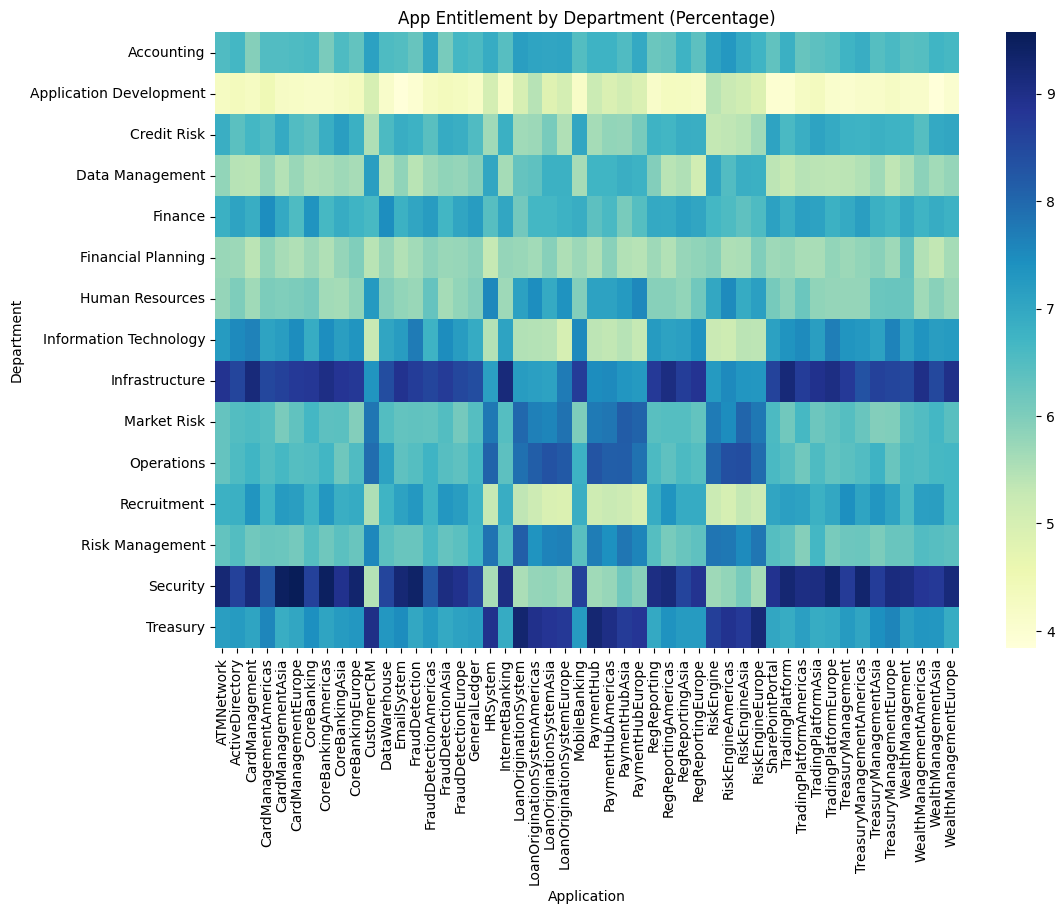

In [ ]:
ct = pd.crosstab(full_df['department'], full_df['app_name'])
ct_pct = ct.div(ct.sum(axis=0), axis=1) * 100
plt.figure(figsize=(12, 8))
sns.heatmap(ct_pct, annot=False, fmt=".1f", cmap="YlGnBu")
plt.title(f'App Entitlement by Department (Percentage)')
plt.xlabel('Application')
plt.ylabel('Department')
plt.show()

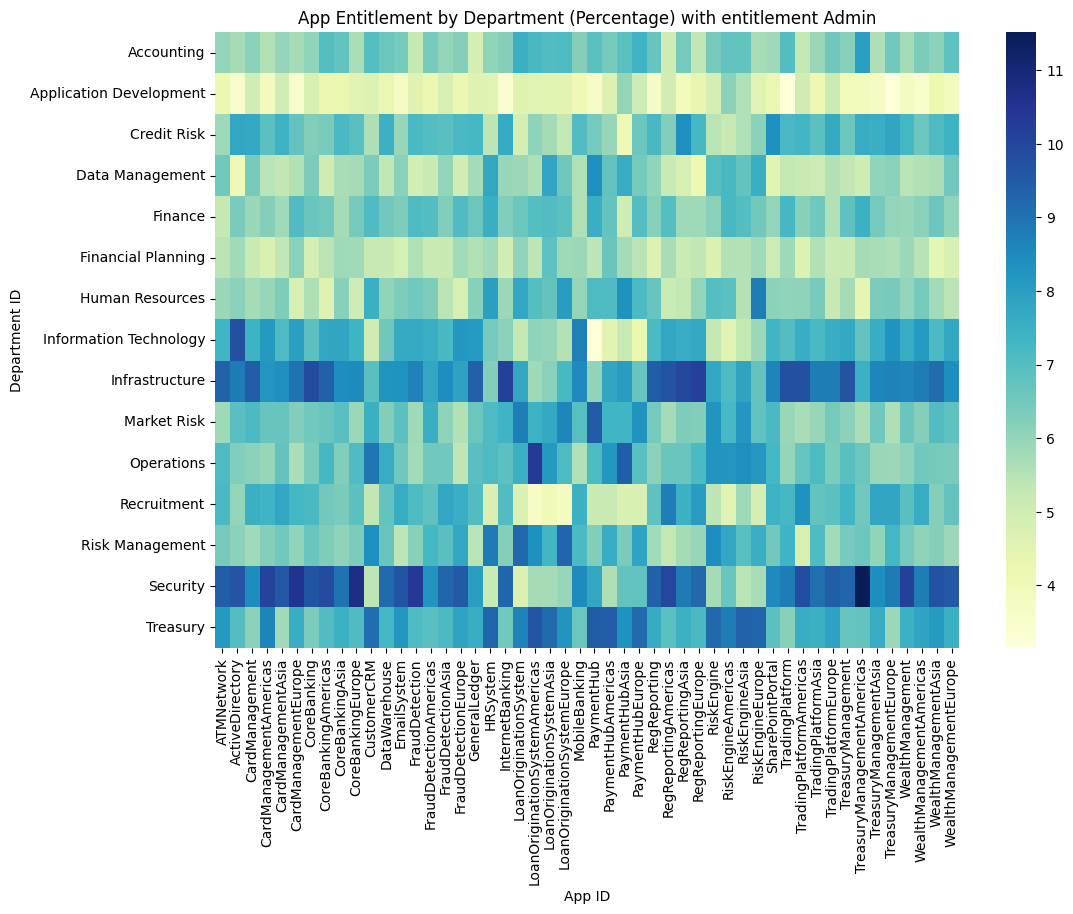

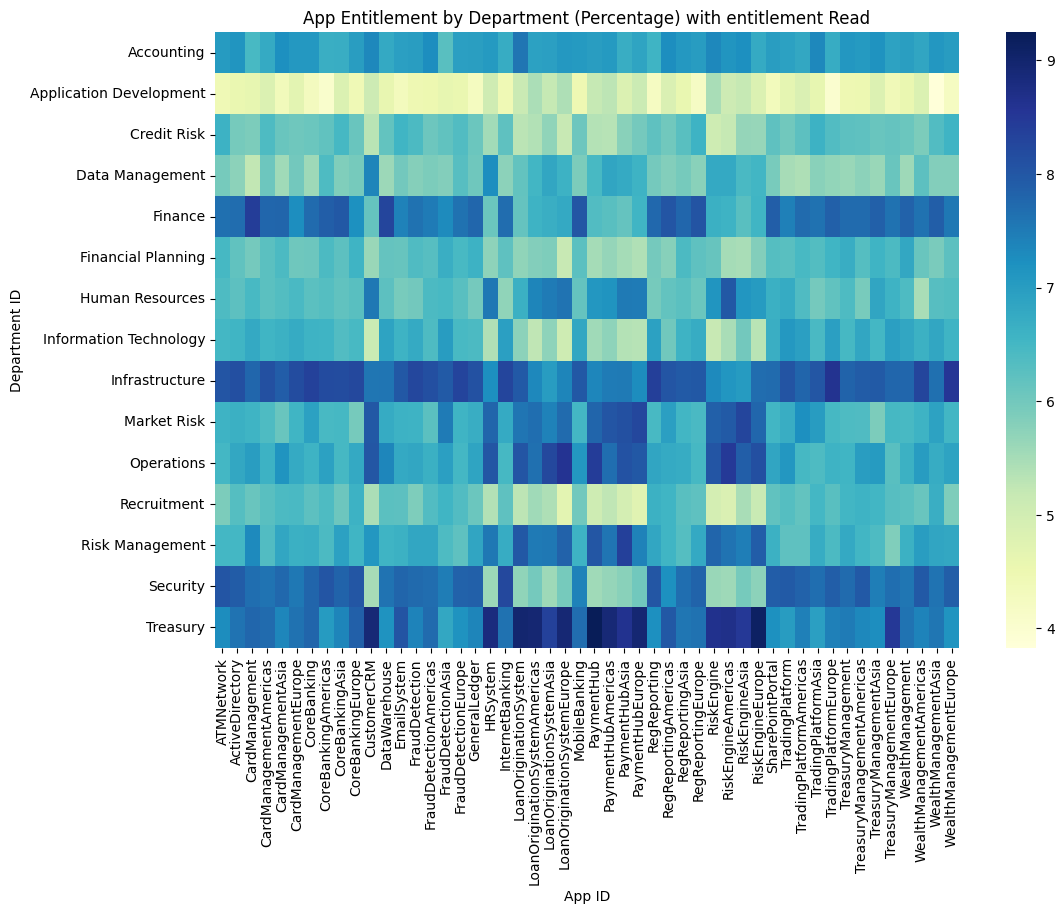

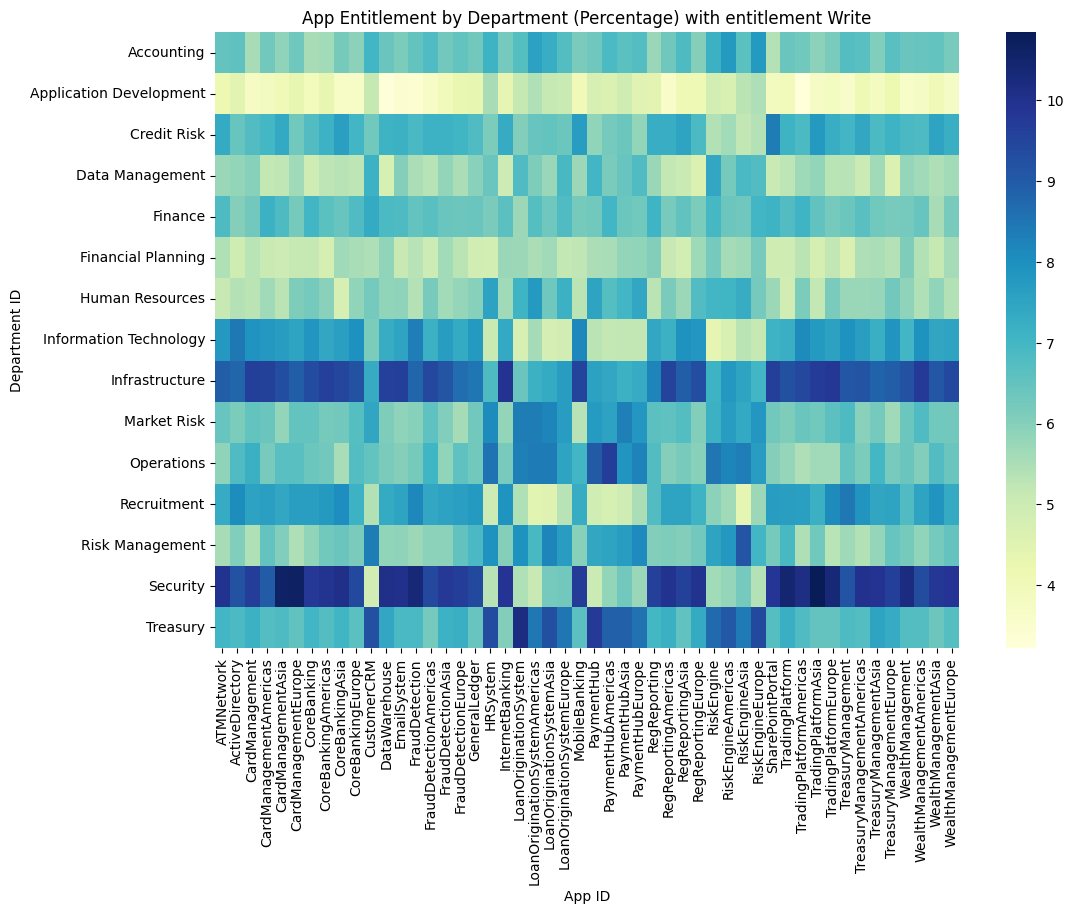

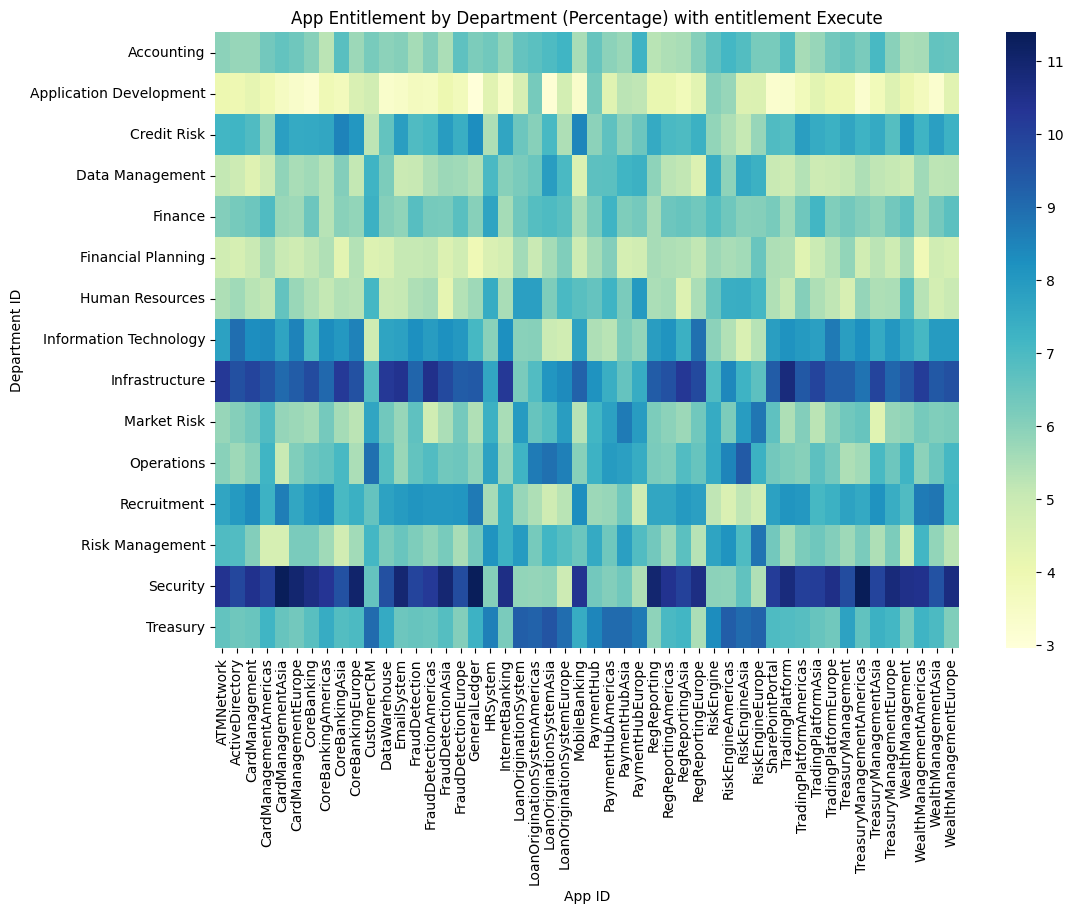

In [ ]:
for i in full_df['entitlement_type'].unique():
    ct = pd.crosstab(full_df[full_df['entitlement_type'] == i]['department'], full_df[full_df['entitlement_type'] == i]['app_name'])
    ct_pct = ct.div(ct.sum(axis=0), axis=1) * 100
    plt.figure(figsize=(12, 8))
    sns.heatmap(ct_pct, annot=False, fmt=".1f", cmap="YlGnBu")
    plt.title(f"App Entitlement by Department (Percentage) with entitlement {i}")
    plt.xlabel("App ID")
    plt.ylabel("Department ID")
    plt.show()

## Number of entitlements

In order to determine if the mined roles are reasonable, we need to know how entitlements currently look, specifically understanding how many entitlements and what kinds of entitlements employees have.


We start with exploring how many entitlements employees have.

In [ ]:
entitlements_per_user_app = (
    full_df
    .groupby(['employee_id', 'app_name'])['entitlement_name']
    .nunique()
    .reset_index(name='num_entitlements')
)

entitlements_matrix = entitlements_per_user_app.pivot(
    index='employee_id',
    columns='app_name',
    values='num_entitlements'
).fillna(0).astype(int)  # Optional: fill NaN with 0 and cast to int

# Add a 'Total' column as the sum across apps
entitlements_matrix.insert(0, 'Total', entitlements_matrix.sum(axis=1))

print('Largest number of entitlements: ', entitlements_matrix.Total.max())
print('Smallest number of entitlements: ', entitlements_matrix.Total.min())

entitlements_matrix.head()

Largest number of entitlements:  891
Smallest number of entitlements:  229


app_name,Total,ATMNetwork,ActiveDirectory,CardManagement,CardManagementAmericas,CardManagementAsia,CardManagementEurope,CoreBanking,CoreBankingAmericas,CoreBankingAsia,...,TradingPlatformAsia,TradingPlatformEurope,TreasuryManagement,TreasuryManagementAmericas,TreasuryManagementAsia,TreasuryManagementEurope,WealthManagement,WealthManagementAmericas,WealthManagementAsia,WealthManagementEurope
employee_id,,,,,,,,,,,,,,,,,,,,,
E001,607,14,14,10,12,13,10,12,12,11,...,15,14,10,13,12,13,15,11,12,15
E002,605,14,12,7,14,13,12,11,12,7,...,8,14,9,14,13,13,15,12,14,12
E003,648,17,16,6,12,17,17,11,14,15,...,17,11,10,11,13,13,14,10,11,13
E004,879,22,26,14,19,21,22,14,18,18,...,19,25,13,20,20,17,18,21,23,24
E005,615,14,15,12,13,10,10,12,10,18,...,12,14,6,17,13,12,12,10,11,15


In [ ]:
apps_per_employee = (
    full_df
    .groupby('employee_id')['app_name']
    .nunique()
    .reset_index(name='num_apps')
)

#print(apps_per_employee.head())

min_apps = apps_per_employee['num_apps'].min()
max_apps = apps_per_employee['num_apps'].max()

print(f"Minimum apps among employees: {min_apps}")
print(f"Maximum apps among employees: {max_apps}")

Minimum apps per employee: 36
Maximum apps per employee: 50


We focus on entitlements per app.

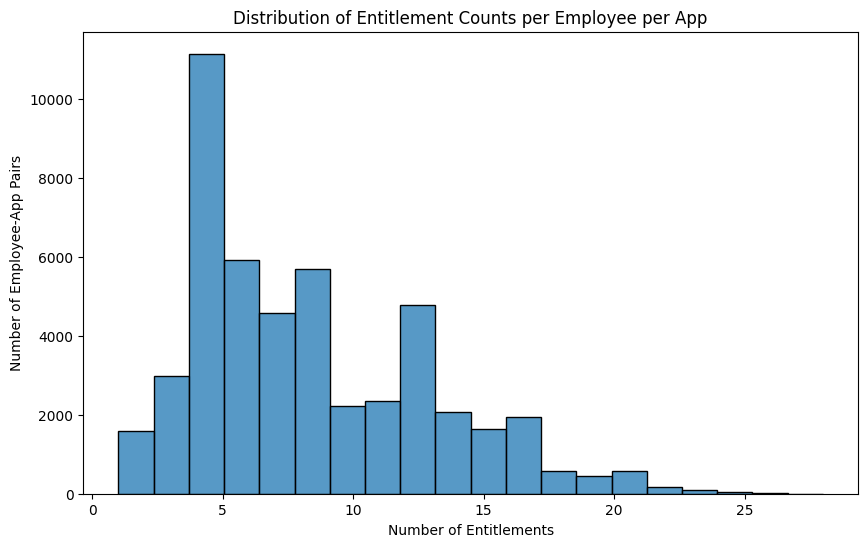

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(entitlements_per_user_app['num_entitlements'], bins=20)
plt.title("Distribution of Entitlement Counts per Employee per App")
plt.xlabel("Number of Entitlements")
plt.ylabel("Number of Employee-App Pairs")
plt.show()

,employee_id,job_title,entitlement_name_clean
74,E004,Chief Technical Director,Admin_ATMNetwork_batchjobs
240,E004,Chief Technical Director,Admin_ATMNetwork_configurationsettings
383,E004,Chief Technical Director,Admin_ATMNetwork_reports
163,E004,Chief Technical Director,Execute_ATMNetwork_auditlogs
374,E004,Chief Technical Director,Execute_ATMNetwork_auditlogs
561,E004,Chief Technical Director,Execute_ATMNetwork_batchjobs
214,E004,Chief Technical Director,Execute_ATMNetwork_dashboards
379,E004,Chief Technical Director,Execute_ATMNetwork_referencedata
215,E004,Chief Technical Director,Execute_ATMNetwork_reports
447,E004,Chief Technical Director,Execute_ATMNetwork_systemparameters


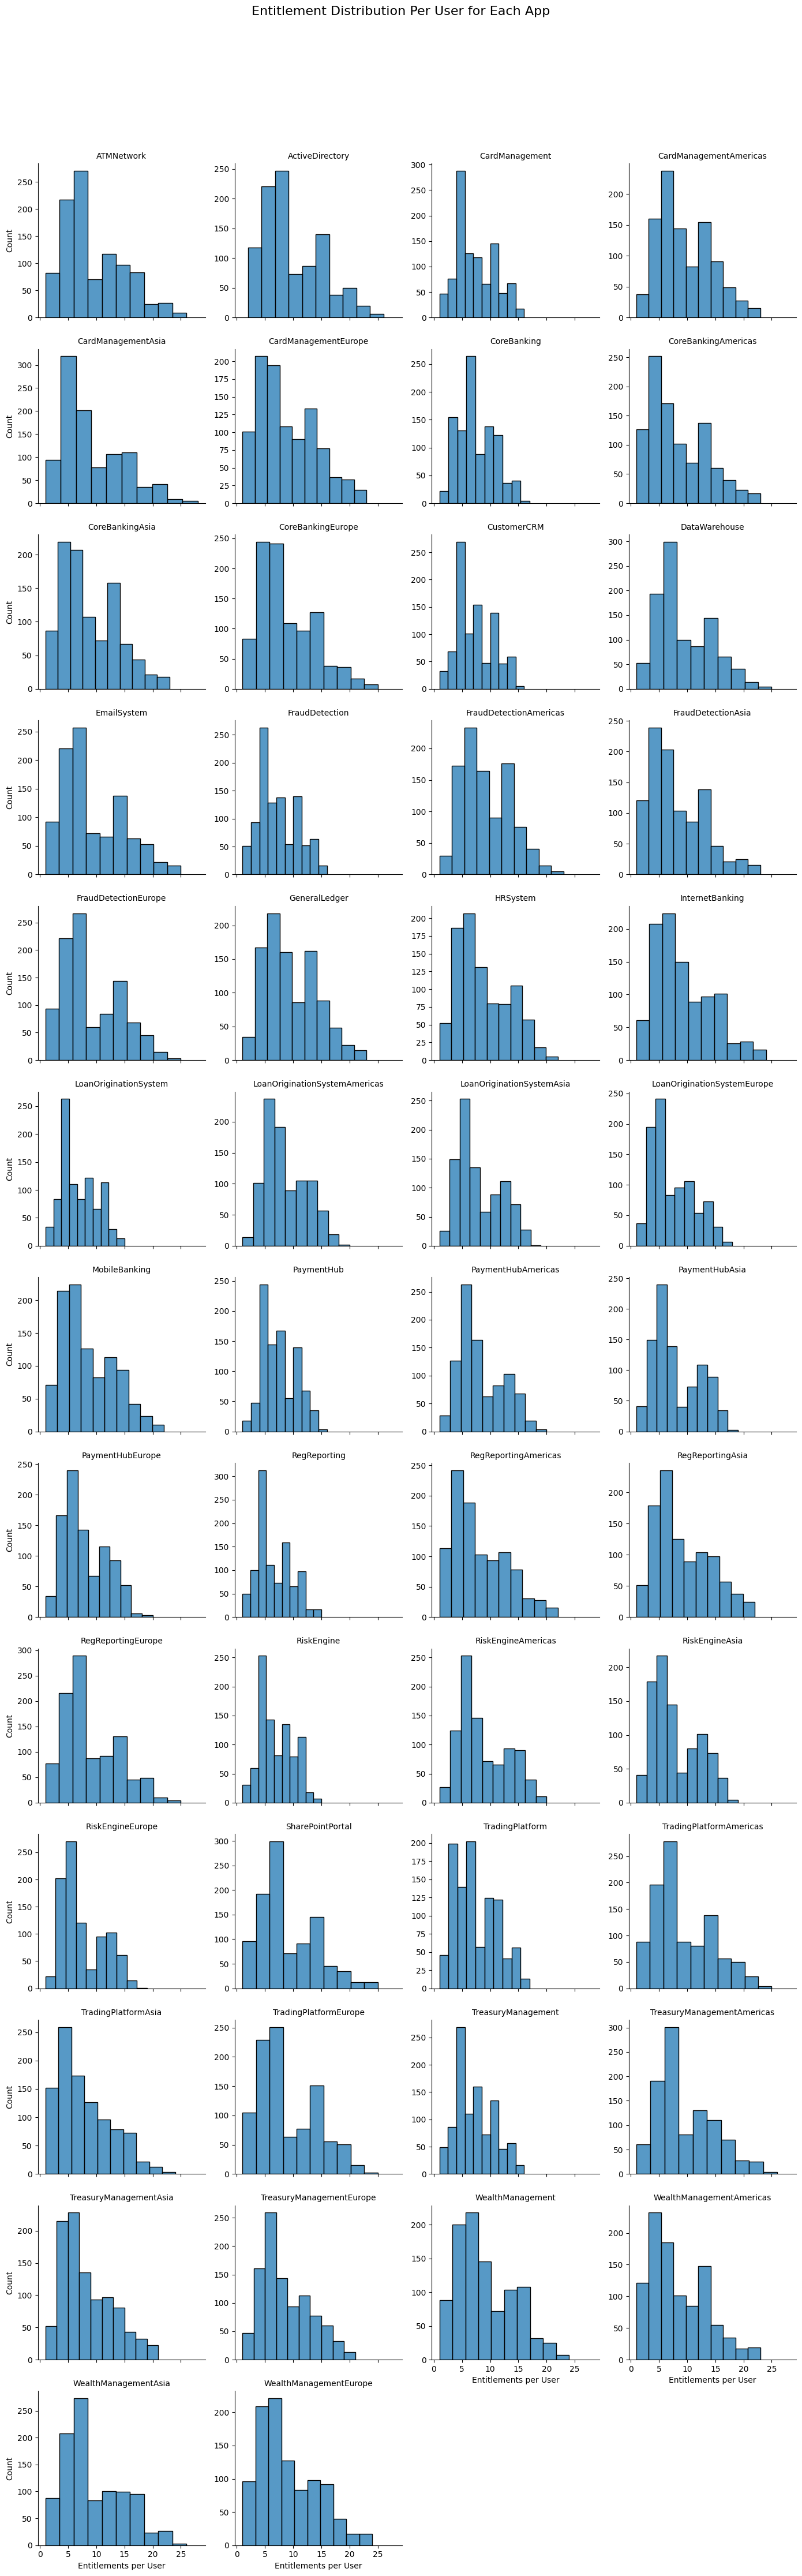

In [ ]:
# Step 1: Count entitlements per employee per app
entitlements_per_user_app = (
    full_df
    .groupby(['employee_id', 'app_name'])['entitlement_name']
    .nunique()
    .reset_index(name='num_entitlements')
)

# Optional: Only keep apps with at least 20 users to avoid noisy plots
apps_with_enough_data = (
    entitlements_per_user_app['app_name']
    .value_counts()
    .loc[lambda x: x >= 20]
    .index
)

filtered_data = entitlements_per_user_app[
    entitlements_per_user_app['app_name'].isin(apps_with_enough_data)
]

# Step 2: Plot — histogram per app using FacetGrid
g = sns.FacetGrid(
    filtered_data,
    col='app_name',
    col_wrap=4,  # Change this for number of plots per row
    sharex=True,
    sharey=False,
    height=3.5
)

g.map(sns.histplot, 'num_entitlements', bins=10, kde=False)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Entitlements per User", "Count")
g.fig.suptitle("Entitlement Distribution Per User for Each App", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.92)  # For the suptitle

plt.show()

The same as above, but split for each entitlement type

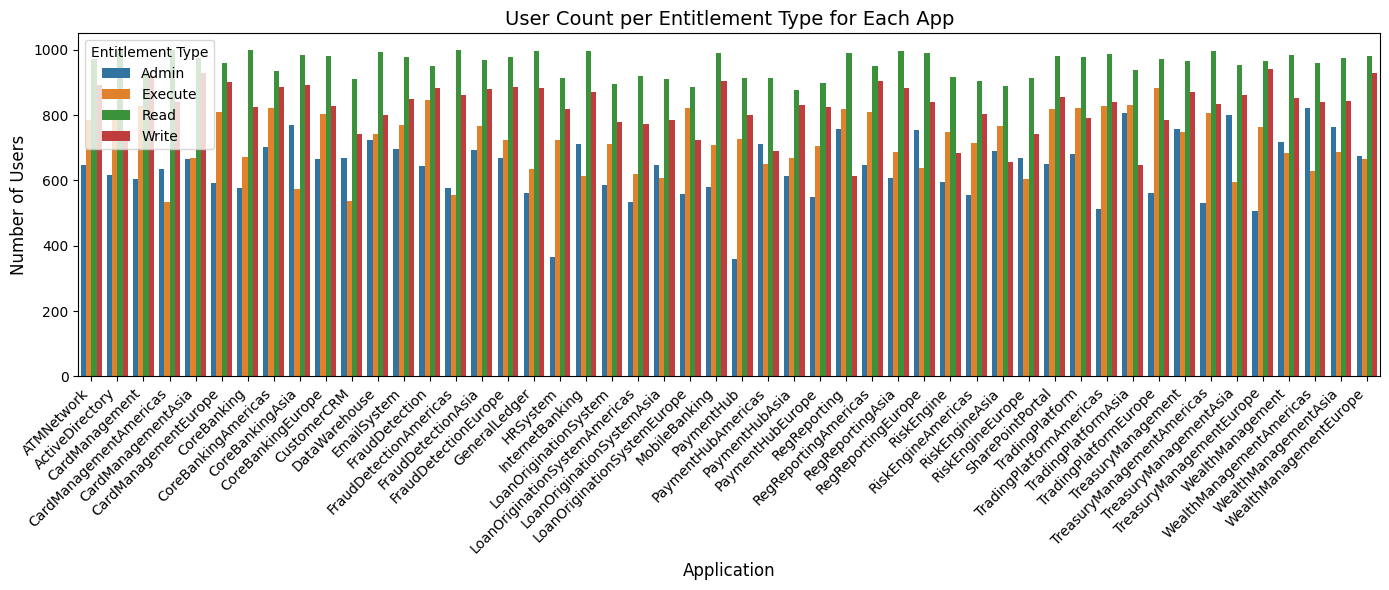

In [ ]:
# Step 1: Extract entitlement type
# (Assumes naming format like "Read_ATMNetwork", "Write_ATMNetwork", etc.)
#full_df[['entitlement_type', 'app_base']] = full_df['entitlement_name'].str.extract(r'^(.*?)_(.*)$')

# Count number of unique users for each (app, entitlement_type)
entitlement_counts = (
    full_df
    .groupby(['app_name', 'entitlement_type'])['employee_id']
    .nunique()
    .reset_index(name='num_users')
)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=entitlement_counts,
    x='app_name',
    y='num_users',
    hue='entitlement_type'
)

plt.title("User Count per Entitlement Type for Each App", fontsize=14)
plt.xlabel("Application", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Entitlement Type')
plt.tight_layout()
plt.show()

In [ ]:
risk_per_type = main_df[['entitlement_name', 'risk_level']].drop_duplicates().set_index('entitlement_name')['risk_level']
print(risk_per_type)

entitlement_name
Admin_TradingPlatformAsianotifications                 8
Admin_FXpositions                                      8
Read_MobileBankingnotifications                        4
Admin_TradingPlatformAmericasconfigurationsettings     8
Write_CardManagementAsiaconfigurationsettings          6
                                                      ..
Admin_CoreBankingEuropeworkflowrules                   8
Admin_TreasuryManagementEuropeconfigurationsettings    8
Admin_WealthManagementAmericasdashboards               8
Admin_LoanOriginationSystemAsiaworkflowrules           8
Admin_Cardaccounts                                     8
Name: risk_level, Length: 1186, dtype: int64


In [ ]:
# Look at the actual entitlements for employees with 3+ entitlements on the same app
high_access = entitlements_per_user_app[
    entitlements_per_user_app['num_entitlements'] >= 20
]

# Merge back to see details
details = full_df.merge(high_access, on=['employee_id', 'app_name'])
details = details.sort_values(['employee_id', 'job_title', 'app_name', 'entitlement_name_clean'])

details[['employee_id', 'job_title', 'entitlement_name_clean']].head(40)

NameError: name 'entitlements_per_user_app' is not defined